# 1. Introduction and Data Description

## Overview of the Project and Objectives
This project aims to analyze the NYC Airbnb Open Data to understand the factors influencing the price of Airbnb listings in New York City. By performing a regression analysis, we seek to identify key predictors of listing prices and build models to predict prices for new listings.

## Dataset Description
The dataset contains information about Airbnb listings in NYC, including variables such as:
- **id**: Unique identifier for each listing
- **name**: Name of the listing
- **host_id**: Unique identifier for the host
- **host_name**: Name of the host
- **neighbourhood_group**: NYC borough (e.g., Manhattan, Brooklyn)
- **neighbourhood**: Specific neighbourhood within the borough
- **latitude and longitude**: Geographical coordinates of the listing
- **room_type**: Type of room (e.g., Entire home/apt, Private room)
- **price**: Price per night
- **minimum_nights**: Minimum number of nights required to book
- **number_of_reviews**: Total number of reviews
- **last_review**: Date of the last review
- **reviews_per_month**: Average number of reviews per month
- **calculated_host_listings_count**: Number of listings by the same host
- **availability_365**: Number of available days within a year
- **number_of_reviews_ltm**: Number of reviews in the last 12 months
- **license**: License status
- **rating**: Rating of the listing
- **bedrooms**: Number of bedrooms
- **beds**: Number of beds
- **baths**: Number of bathrooms

## Importance of Regression Analysis
Regression analysis is a powerful statistical method that allows us to examine the relationship between a dependent variable (in this case, the price of Airbnb listings) and one or more independent variables (features such as room type, neighbourhood, number of reviews, etc.). By using regression analysis, we can identify which factors significantly impact the price and quantify their effects. This information is crucial for hosts who want to set competitive prices and for guests who wish to find the best value for their money.

Regression models can also help in predicting prices for new listings, providing a data-driven approach to price setting. Various types of regression models, such as linear regression, polynomial regression, ridge regression, and lasso regression, will be explored to find the best fit for our data.


# 2. Data Preprocessing



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'NY_airbnb_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Fill missing values with appropriate methods (e.g., mean for numeric, mode for categorical)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df['last_review'].fillna('No Review', inplace=True)
df['license'].fillna('No License', inplace=True)

# Check for non-numeric values in numeric columns
# Identify columns that are supposed to be numeric but contain non-numeric values
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'bedrooms', 'beds', 'baths']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values created from coercion
df.dropna(subset=numeric_columns, inplace=True)

# Statistical summary of numerical columns
stat_summary = df.describe()
print("\nStatistical Summary:\n", stat_summary)


                   id                                               name  \
0             1312228         Rental unit in Brooklyn · ★5.0 · 1 bedroom   
1            45277537  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2  971353993633883038  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3             3857863  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4            40896611  Condo in New York · ★4.91 · Studio · 1 bed · 1...   

     host_id           host_name neighbourhood_group       neighbourhood  \
0    7130382              Walter            Brooklyn        Clinton Hill   
1   51501835            Jeniffer           Manhattan      Hell's Kitchen   
2  528871354              Joshua           Manhattan             Chelsea   
3   19902271  John And Catherine           Manhattan  Washington Heights   
4   61391963      Stay With Vibe           Manhattan         Murray Hill   

    latitude  longitude        room_type  price  ...  last_review  \
0  40.683710 -73.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


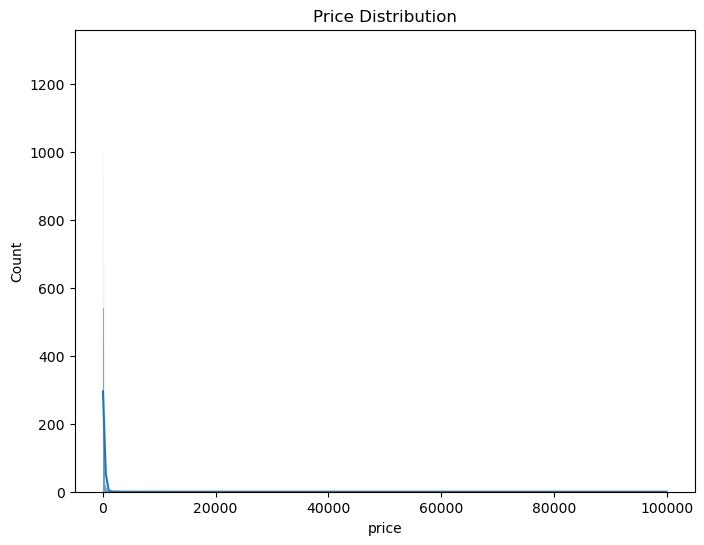

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


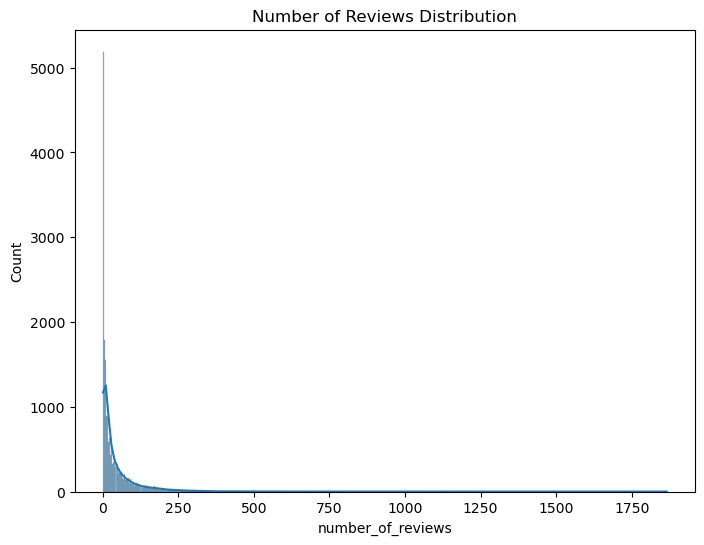

In [2]:
#Visualize Distributions of Numerical Features

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['number_of_reviews'], kde=True)
plt.title('Number of Reviews Distribution')
plt.show()




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


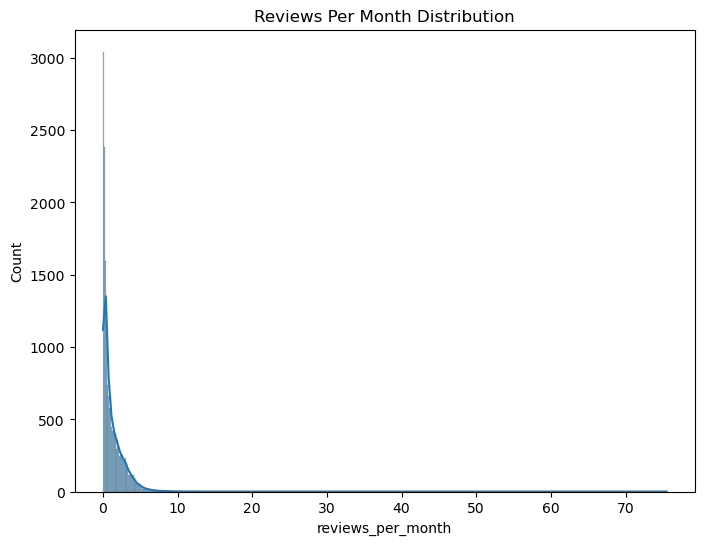

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


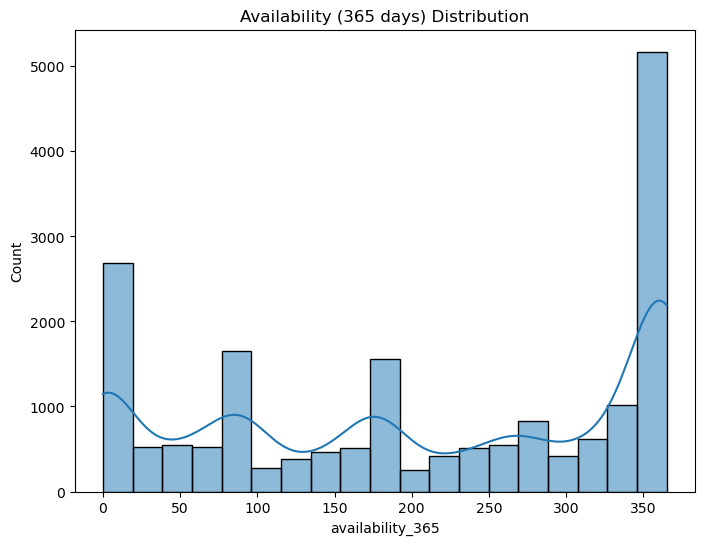

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(df['reviews_per_month'], kde=True)
plt.title('Reviews Per Month Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['availability_365'], kde=True)
plt.title('Availability (365 days) Distribution')
plt.show()

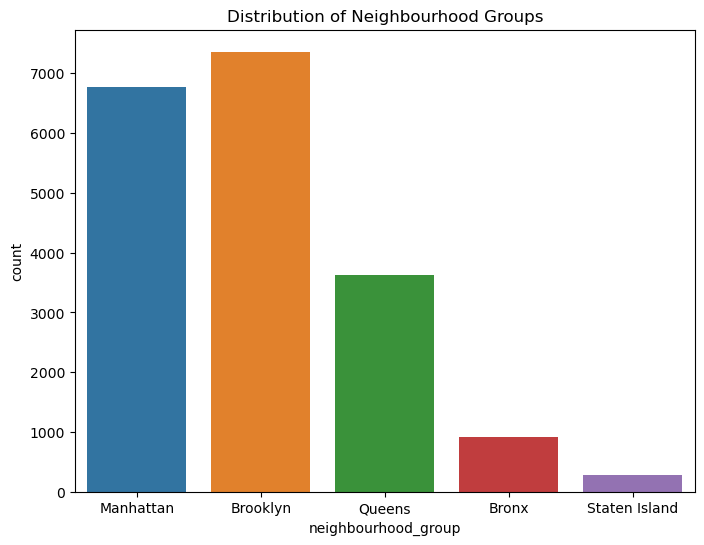

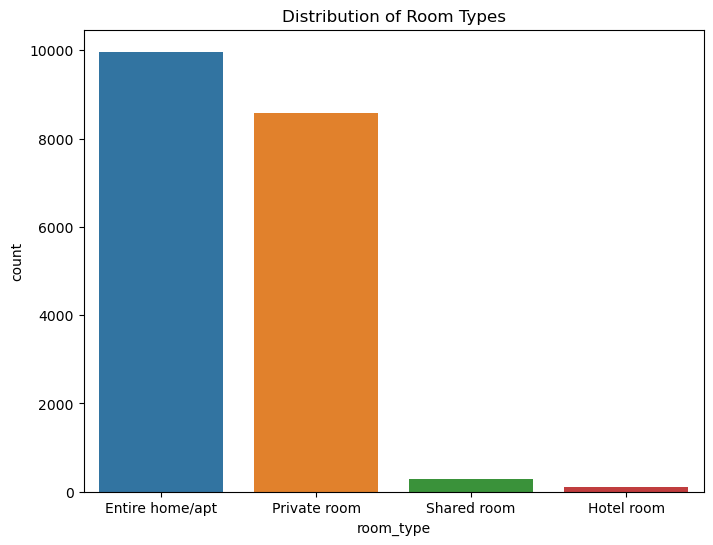

In [4]:
# Visualize Categorical Feature - Neighbourhood Group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Distribution of Neighbourhood Groups')
plt.show()

#Visualize Categorical Feature - Room Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type')
plt.title('Distribution of Room Types')
plt.show()



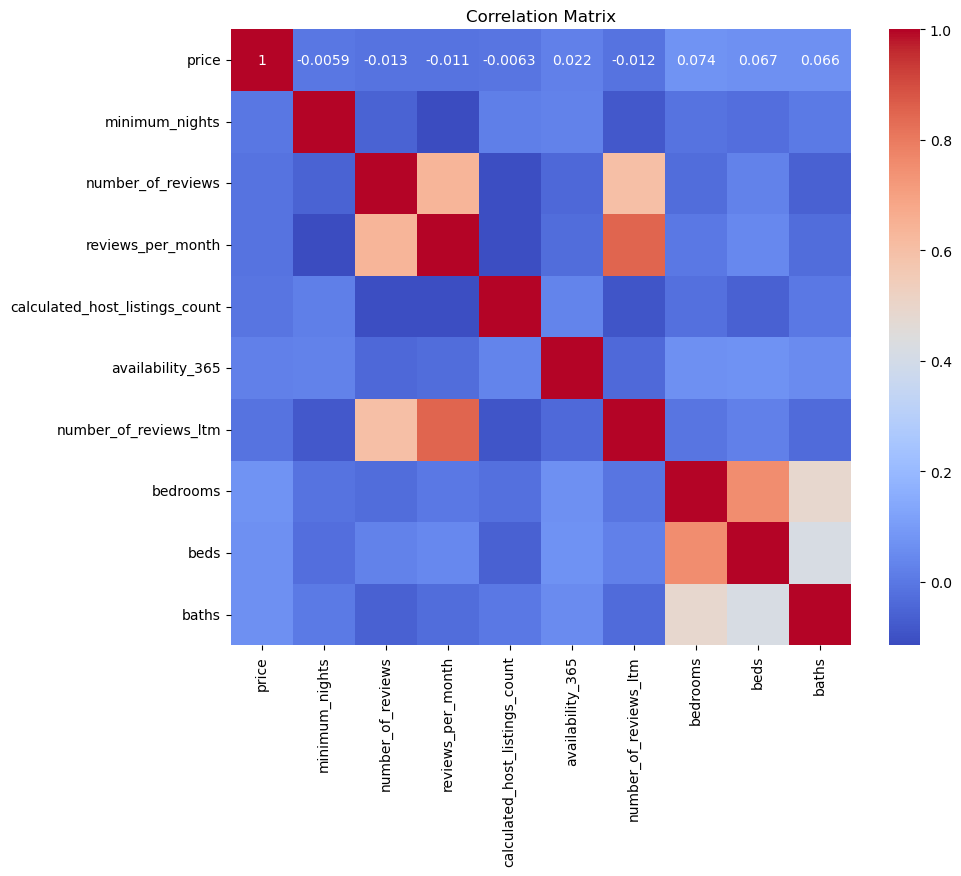

In [5]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


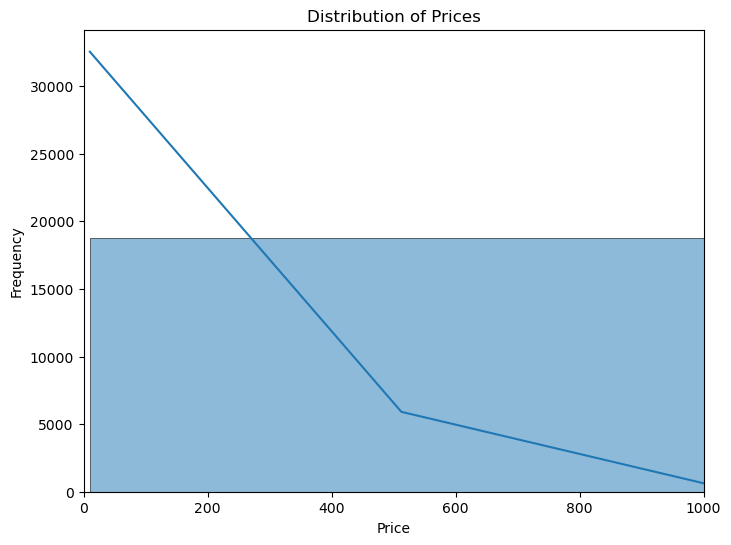

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


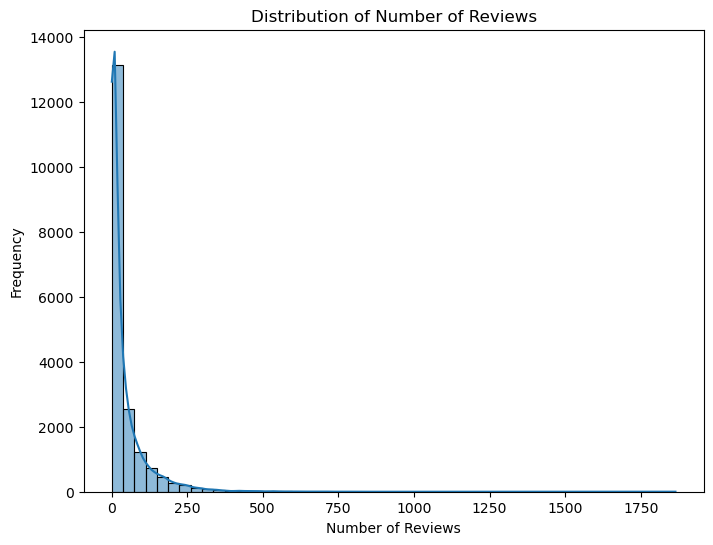

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


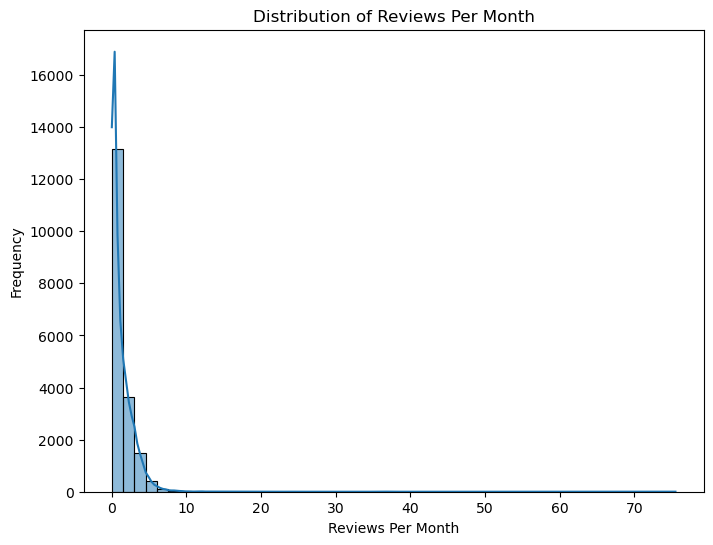

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


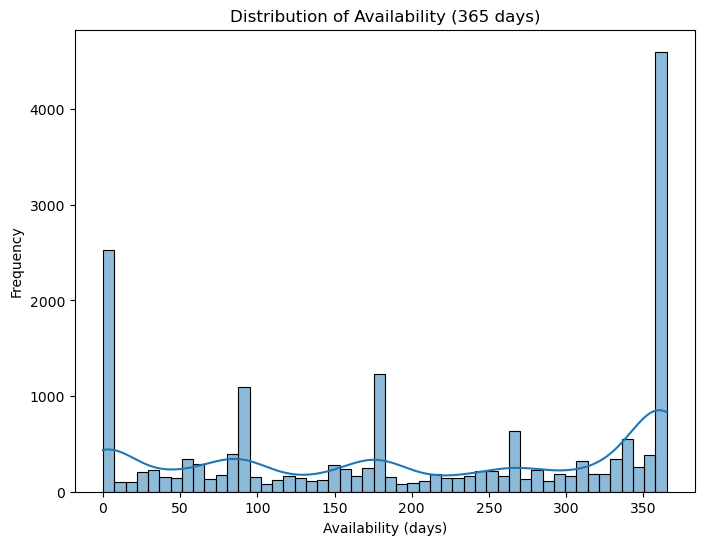

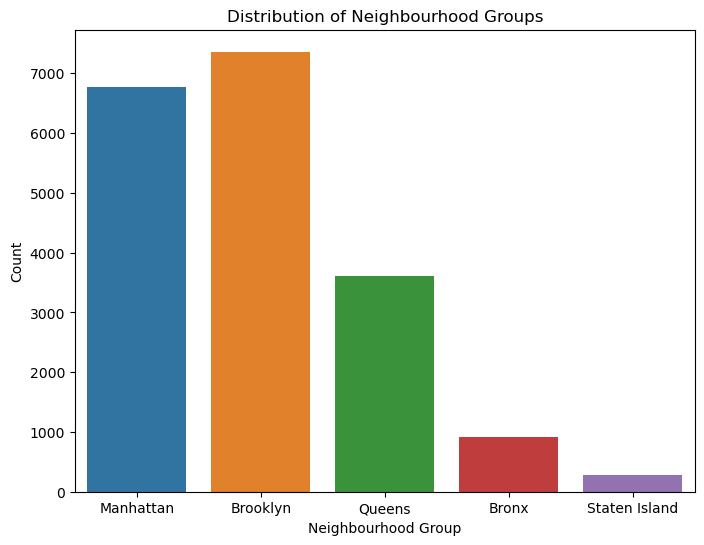

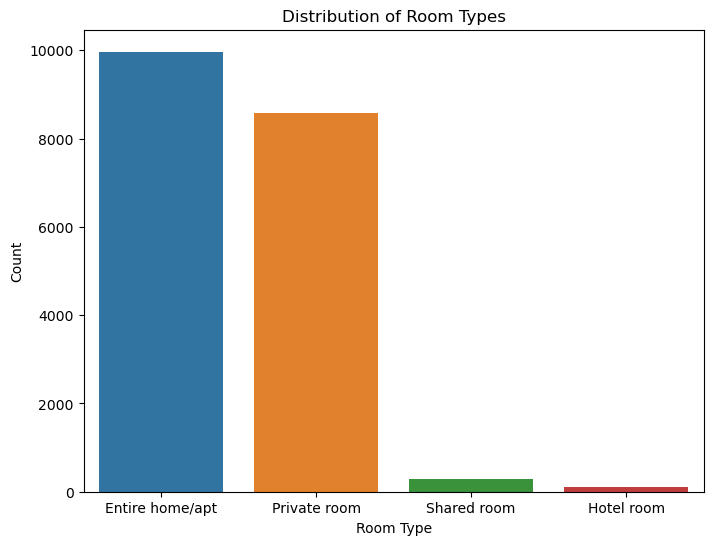

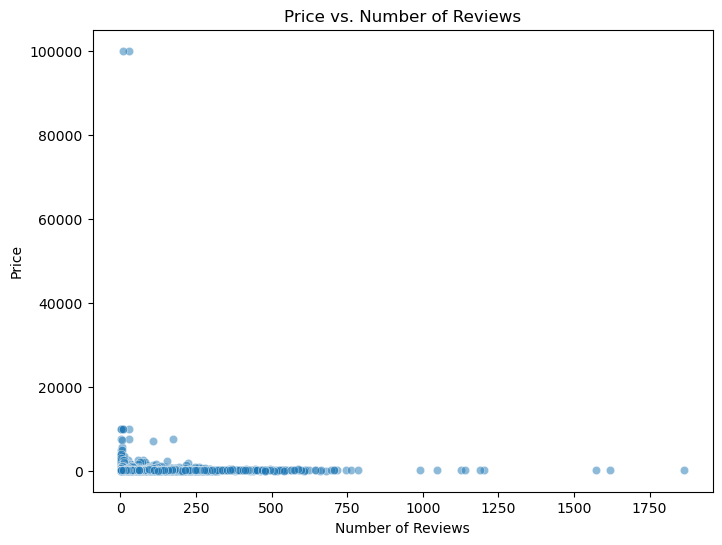

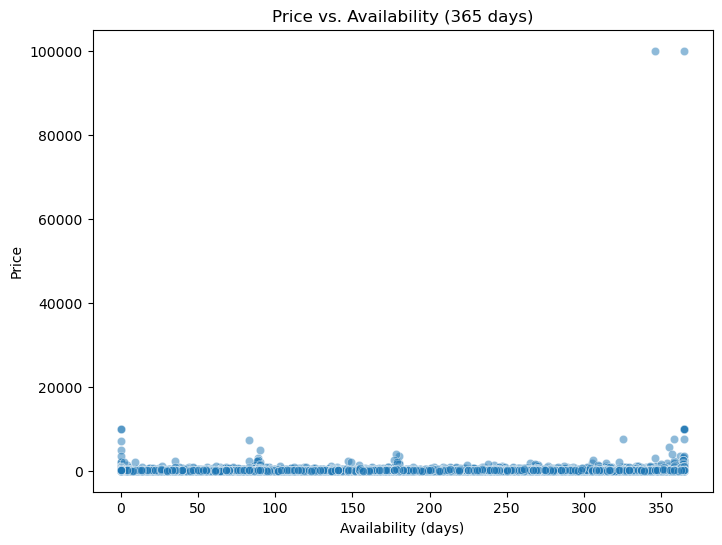

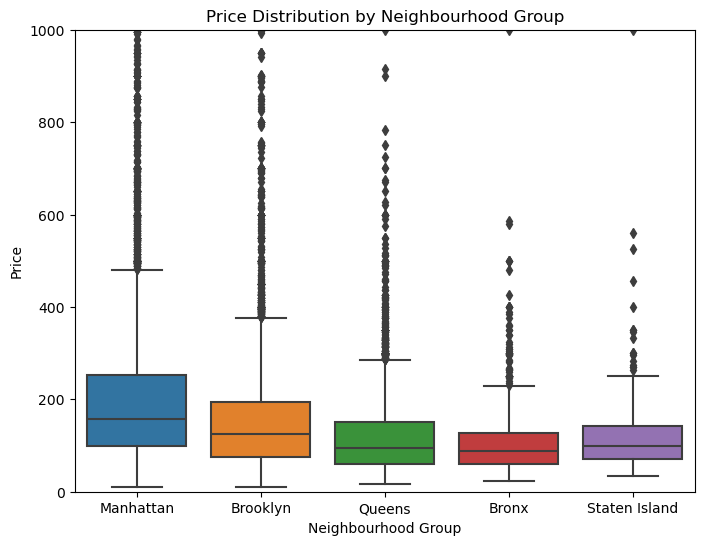

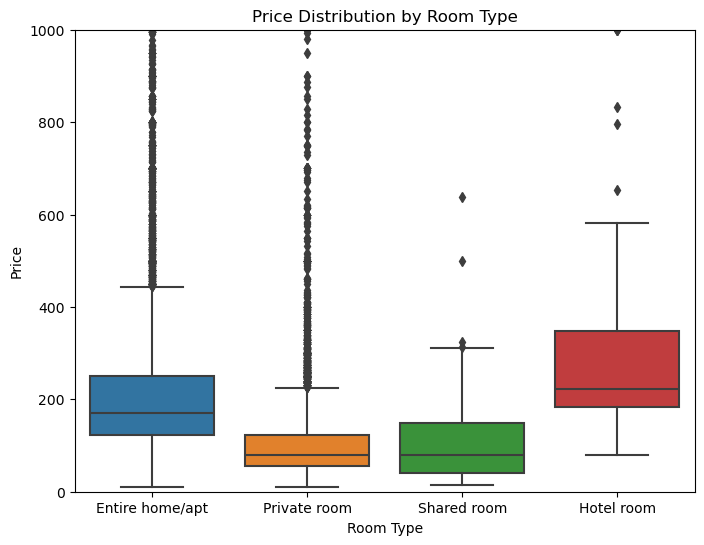

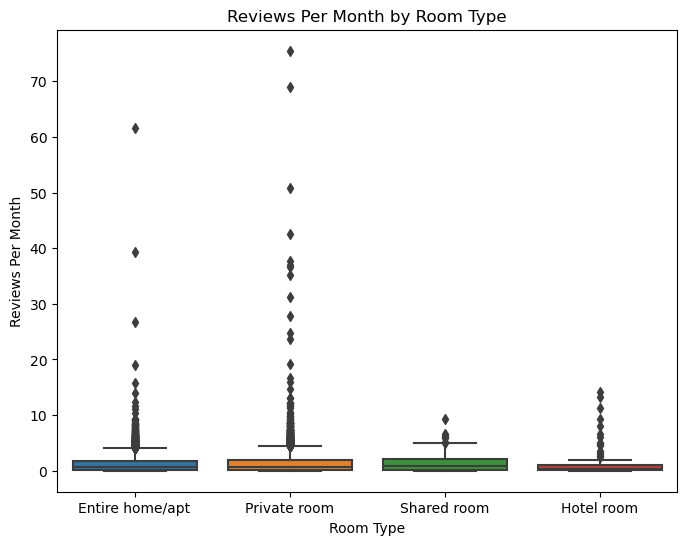

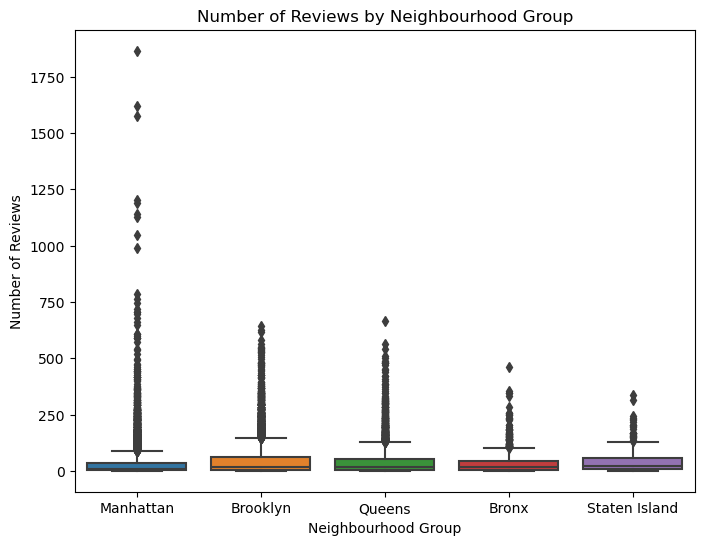

In [6]:
#Additional Plots
#Price Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # Limiting the x-axis for better visibility
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#Number of Reviews Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()
#Reviews Per Month Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['reviews_per_month'], bins=50, kde=True)
plt.title('Distribution of Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Frequency')
plt.show()
#Availability Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['availability_365'], bins=50, kde=True)
plt.title('Distribution of Availability (365 days)')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()
#Neighbourhood Group Distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Distribution of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()
#Room Type Distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()
#Price vs. Number of Reviews

plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()
#Price vs. Availability

plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
plt.title('Price vs. Availability (365 days)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()
#Price Distribution by Neighbourhood Group

plt.figure(figsize=(8, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0, 1000)  # Limiting y-axis for better visibility
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()
#Price Distribution by Room Type

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 1000)  # Limiting y-axis for better visibility
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()
#Reviews Per Month by Room Type

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='reviews_per_month', data=df)
plt.title('Reviews Per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Reviews Per Month')
plt.show()
#Number of Reviews by Neighbourhood Group

plt.figure(figsize=(8, 6))
sns.boxplot(x='neighbourhood_group', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()







In [7]:
# Statistical summary of numerical columns
stat_summary = df.describe()

# Convert the summary statistics to a DataFrame
stat_summary_df = stat_summary.reset_index()
stat_summary_df.columns.name = None  # Remove the name of the index column

# Display the DataFrame
print(stat_summary_df)


   index            id       host_id      latitude     longitude  \
0  count  1.893400e+04  1.893400e+04  18934.000000  18934.000000   
1   mean  3.111585e+17  1.763845e+08     40.725606    -73.936773   
2    std  3.921531e+17  1.740101e+08      0.061267      0.062215   
3    min  6.848000e+03  1.678000e+03     40.500314    -74.249840   
4    25%  2.694977e+07  1.975818e+07     40.682865    -73.978318   
5    50%  5.046517e+07  1.103463e+08     40.719990    -73.947335   
6    75%  7.269412e+17  3.158839e+08     40.762839    -73.915049   
7    max  1.054376e+18  5.504035e+08     40.911147    -73.713650   

           price  minimum_nights  number_of_reviews  reviews_per_month  \
0   18934.000000    18934.000000       18934.000000       18934.000000   
1     190.566969       28.661931          42.968153           1.269512   
2    1067.593109       34.266639          74.156290           1.880605   
3      10.000000        1.000000           1.000000           0.010000   
4      79.000000 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

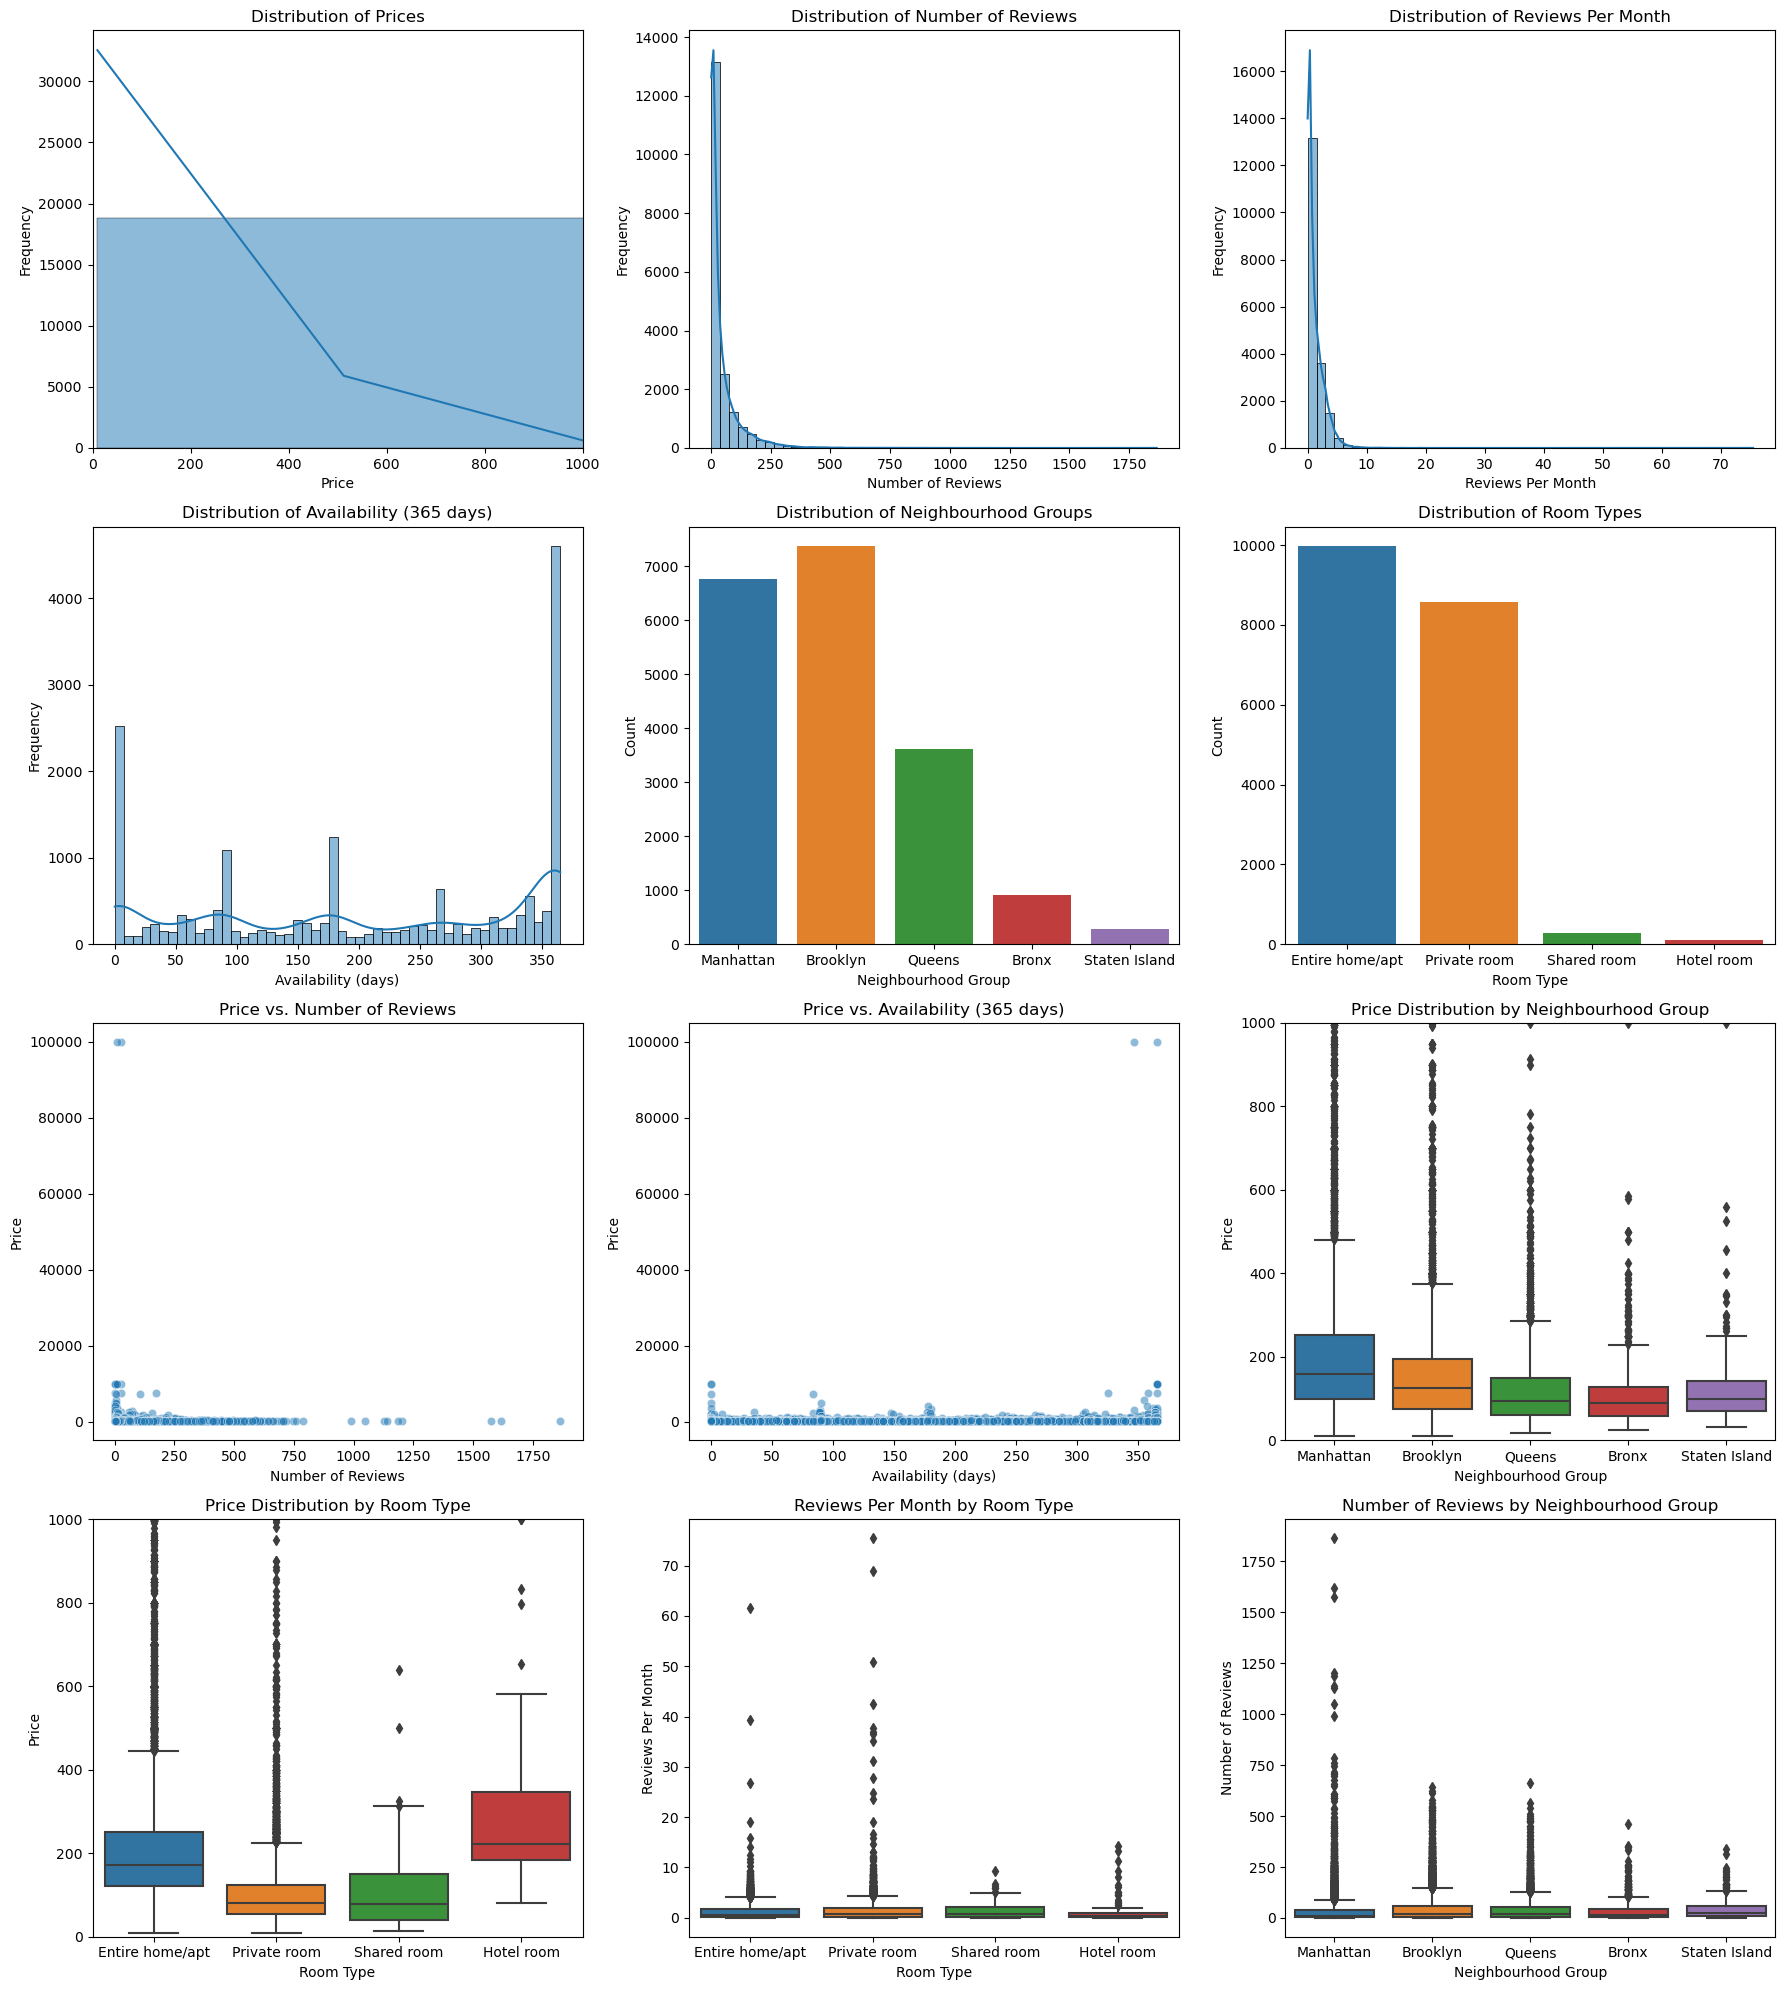

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 20))

# Plot 1: Price Distribution
sns.histplot(df['price'], bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlim(0, 1000)
axes[0, 0].set_title('Distribution of Prices')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Number of Reviews Distribution
sns.histplot(df['number_of_reviews'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Number of Reviews')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Reviews Per Month Distribution
sns.histplot(df['reviews_per_month'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Reviews Per Month')
axes[0, 2].set_xlabel('Reviews Per Month')
axes[0, 2].set_ylabel('Frequency')

# Plot 4: Availability Distribution
sns.histplot(df['availability_365'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Availability (365 days)')
axes[1, 0].set_xlabel('Availability (days)')
axes[1, 0].set_ylabel('Frequency')

# Plot 5: Neighbourhood Group Distribution
sns.countplot(x='neighbourhood_group', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Neighbourhood Groups')
axes[1, 1].set_xlabel('Neighbourhood Group')
axes[1, 1].set_ylabel('Count')

# Plot 6: Room Type Distribution
sns.countplot(x='room_type', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Room Types')
axes[1, 2].set_xlabel('Room Type')
axes[1, 2].set_ylabel('Count')

# Plot 7: Price vs. Number of Reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df, ax=axes[2, 0], alpha=0.5)
axes[2, 0].set_title('Price vs. Number of Reviews')
axes[2, 0].set_xlabel('Number of Reviews')
axes[2, 0].set_ylabel('Price')

# Plot 8: Price vs. Availability
sns.scatterplot(x='availability_365', y='price', data=df, ax=axes[2, 1], alpha=0.5)
axes[2, 1].set_title('Price vs. Availability (365 days)')
axes[2, 1].set_xlabel('Availability (days)')
axes[2, 1].set_ylabel('Price')

# Plot 9: Price Distribution by Neighbourhood Group
sns.boxplot(x='neighbourhood_group', y='price', data=df, ax=axes[2, 2])
axes[2, 2].set_ylim(0, 1000)
axes[2, 2].set_title('Price Distribution by Neighbourhood Group')
axes[2, 2].set_xlabel('Neighbourhood Group')
axes[2, 2].set_ylabel('Price')

# Plot 10: Price Distribution by Room Type
sns.boxplot(x='room_type', y='price', data=df, ax=axes[3, 0])
axes[3, 0].set_ylim(0, 1000)
axes[3, 0].set_title('Price Distribution by Room Type')
axes[3, 0].set_xlabel('Room Type')
axes[3, 0].set_ylabel('Price')

# Plot 11: Reviews Per Month by Room Type
sns.boxplot(x='room_type', y='reviews_per_month', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Reviews Per Month by Room Type')
axes[3, 1].set_xlabel('Room Type')
axes[3, 1].set_ylabel('Reviews Per Month')

# Plot 12: Number of Reviews by Neighbourhood Group
sns.boxplot(x='neighbourhood_group', y='number_of_reviews', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Number of Reviews by Neighbourhood Group')
axes[3, 2].set_xlabel('Neighbourhood Group')
axes[3, 2].set_ylabel('Number of Reviews')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('airbnb_data_visualization.png', dpi=300)

# Show the figure
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

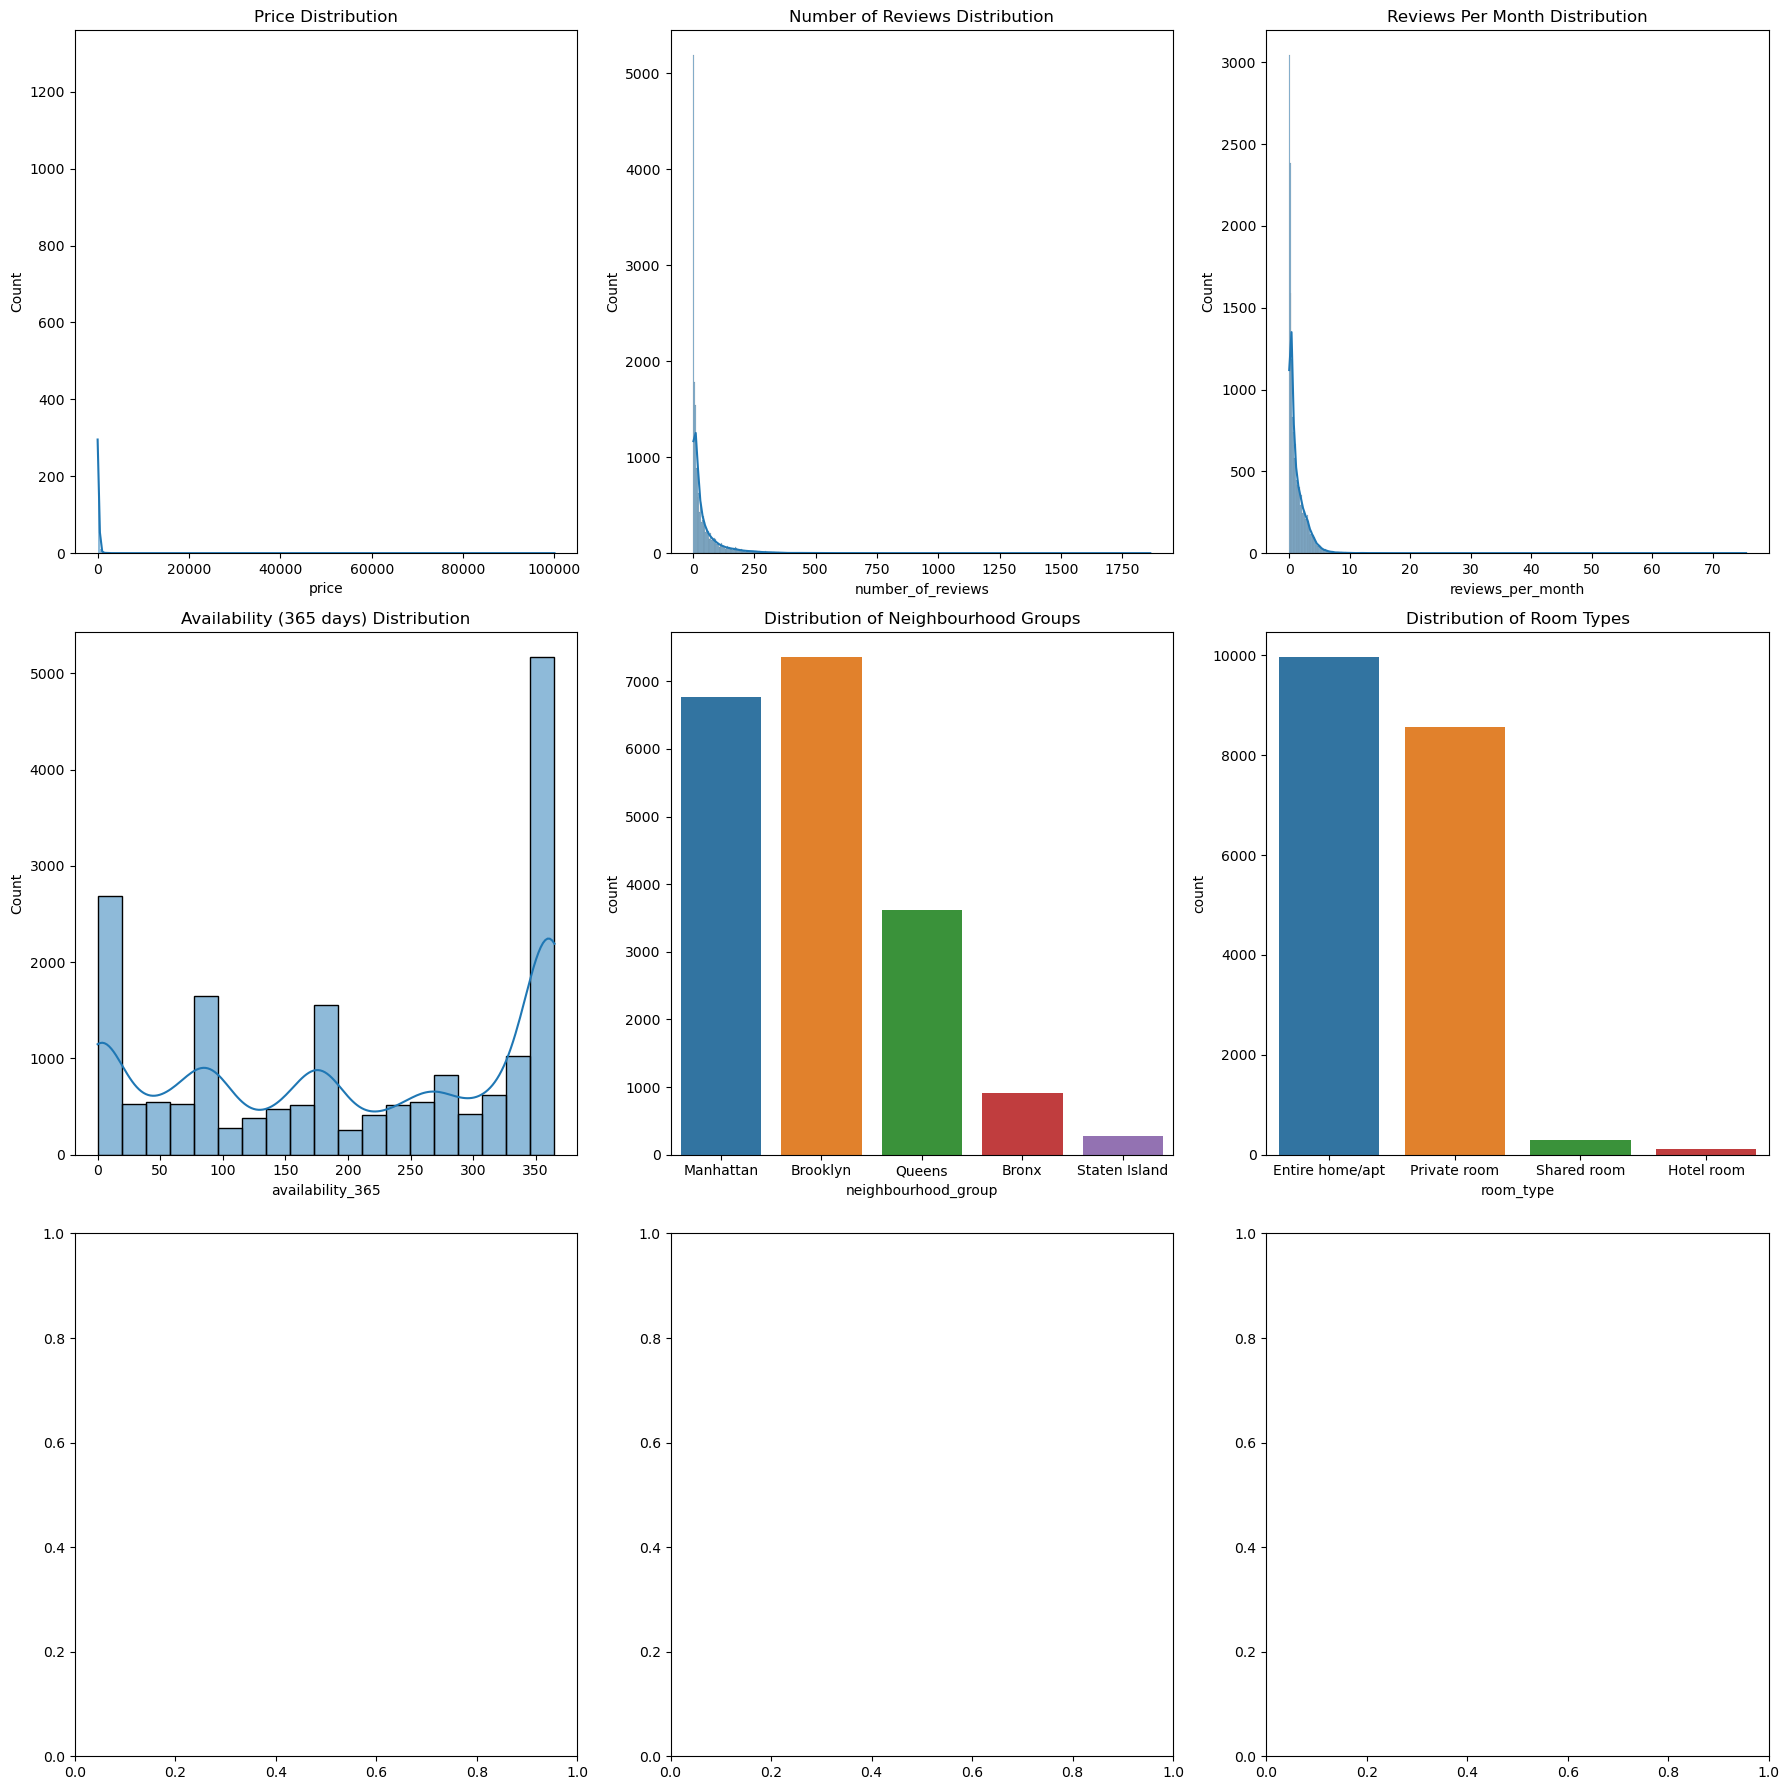

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns for correlation heatmap
numeric_columns = ['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plot 1: Price Distribution
sns.histplot(df['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')

# Plot 2: Number of Reviews Distribution
sns.histplot(df['number_of_reviews'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Number of Reviews Distribution')

# Plot 3: Reviews Per Month Distribution
sns.histplot(df['reviews_per_month'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Reviews Per Month Distribution')

# Plot 4: Availability Distribution
sns.histplot(df['availability_365'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Availability (365 days) Distribution')

# Plot 5: Neighbourhood Group Distribution
sns.countplot(data=df, x='neighbourhood_group', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Neighbourhood Groups')

# Plot 6: Room Type Distribution
sns.countplot(data=df, x='room_type', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Room Types')



# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('additional_airbnb_data_visualization.png', dpi=300)

# Show the figure
plt.show()


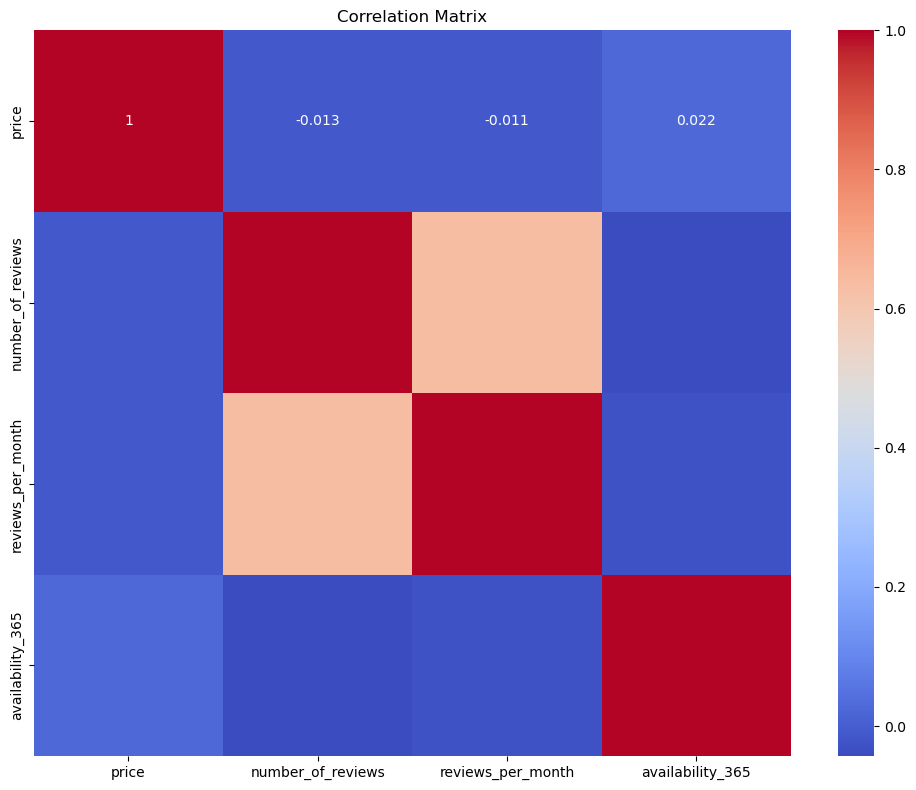

In [10]:
# Plot 7: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Model Selection and Model Evaluation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
# Define the target column
target_column = 'price'

# Sample a fraction of the data for faster computation (optional)
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Define features and target
X = df_sample.drop(target_column, axis=1)
y = df_sample[target_column]

# Convert non-numeric columns to numeric (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Linear Regression Mean Squared Error: 282610.0810386324
Linear Regression Root Mean Squared Error: 531.6108360808989
Linear Regression Mean Absolute Error: 127.77633663509073
Linear Regression Mean Absolute Percentage Error: 90.973678732329
Linear Regression R^2 Score: 0.0024810045045728923


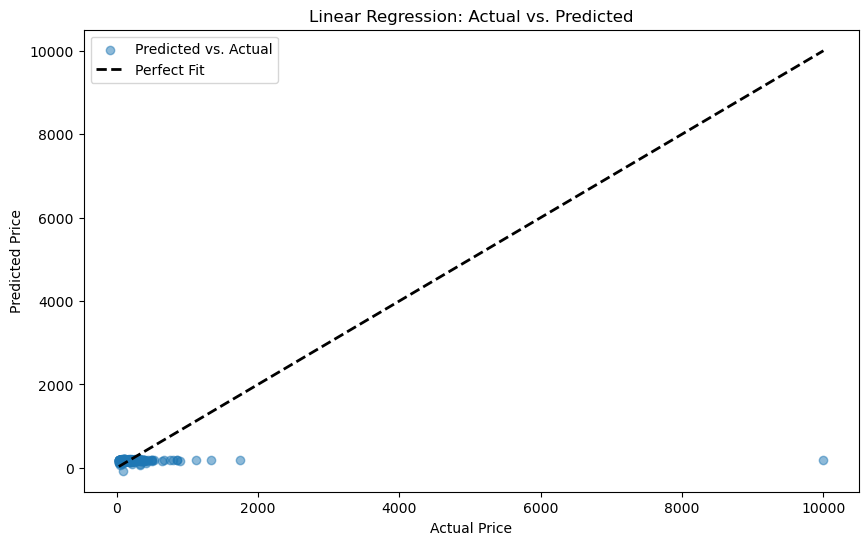

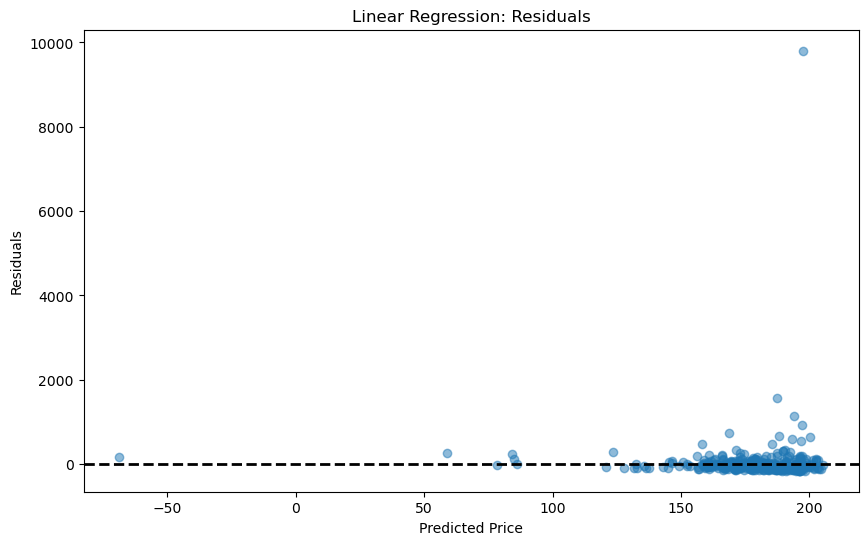

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# Sample the data to avoid crashes
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Preprocess the data
# Convert non-numeric values to NaN
df_sample['rating'] = pd.to_numeric(df_sample['rating'], errors='coerce')

# Fill missing values with mean (for numeric columns)
df_sample['rating'].fillna(df_sample['rating'].mean(), inplace=True)

# Define features and target
X = df_sample[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'rating']]
y = df_sample['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression Root Mean Squared Error: {rmse}')
print(f'Linear Regression Mean Absolute Error: {mae}')
print(f'Linear Regression Mean Absolute Percentage Error: {mape}')
print(f'Linear Regression R^2 Score: {r2}')

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.savefig('linear_regression_actual_vs_predicted.png')
plt.show()

# Plot Residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.title('Linear Regression: Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.savefig('linear_regression_residuals.png')
plt.show()


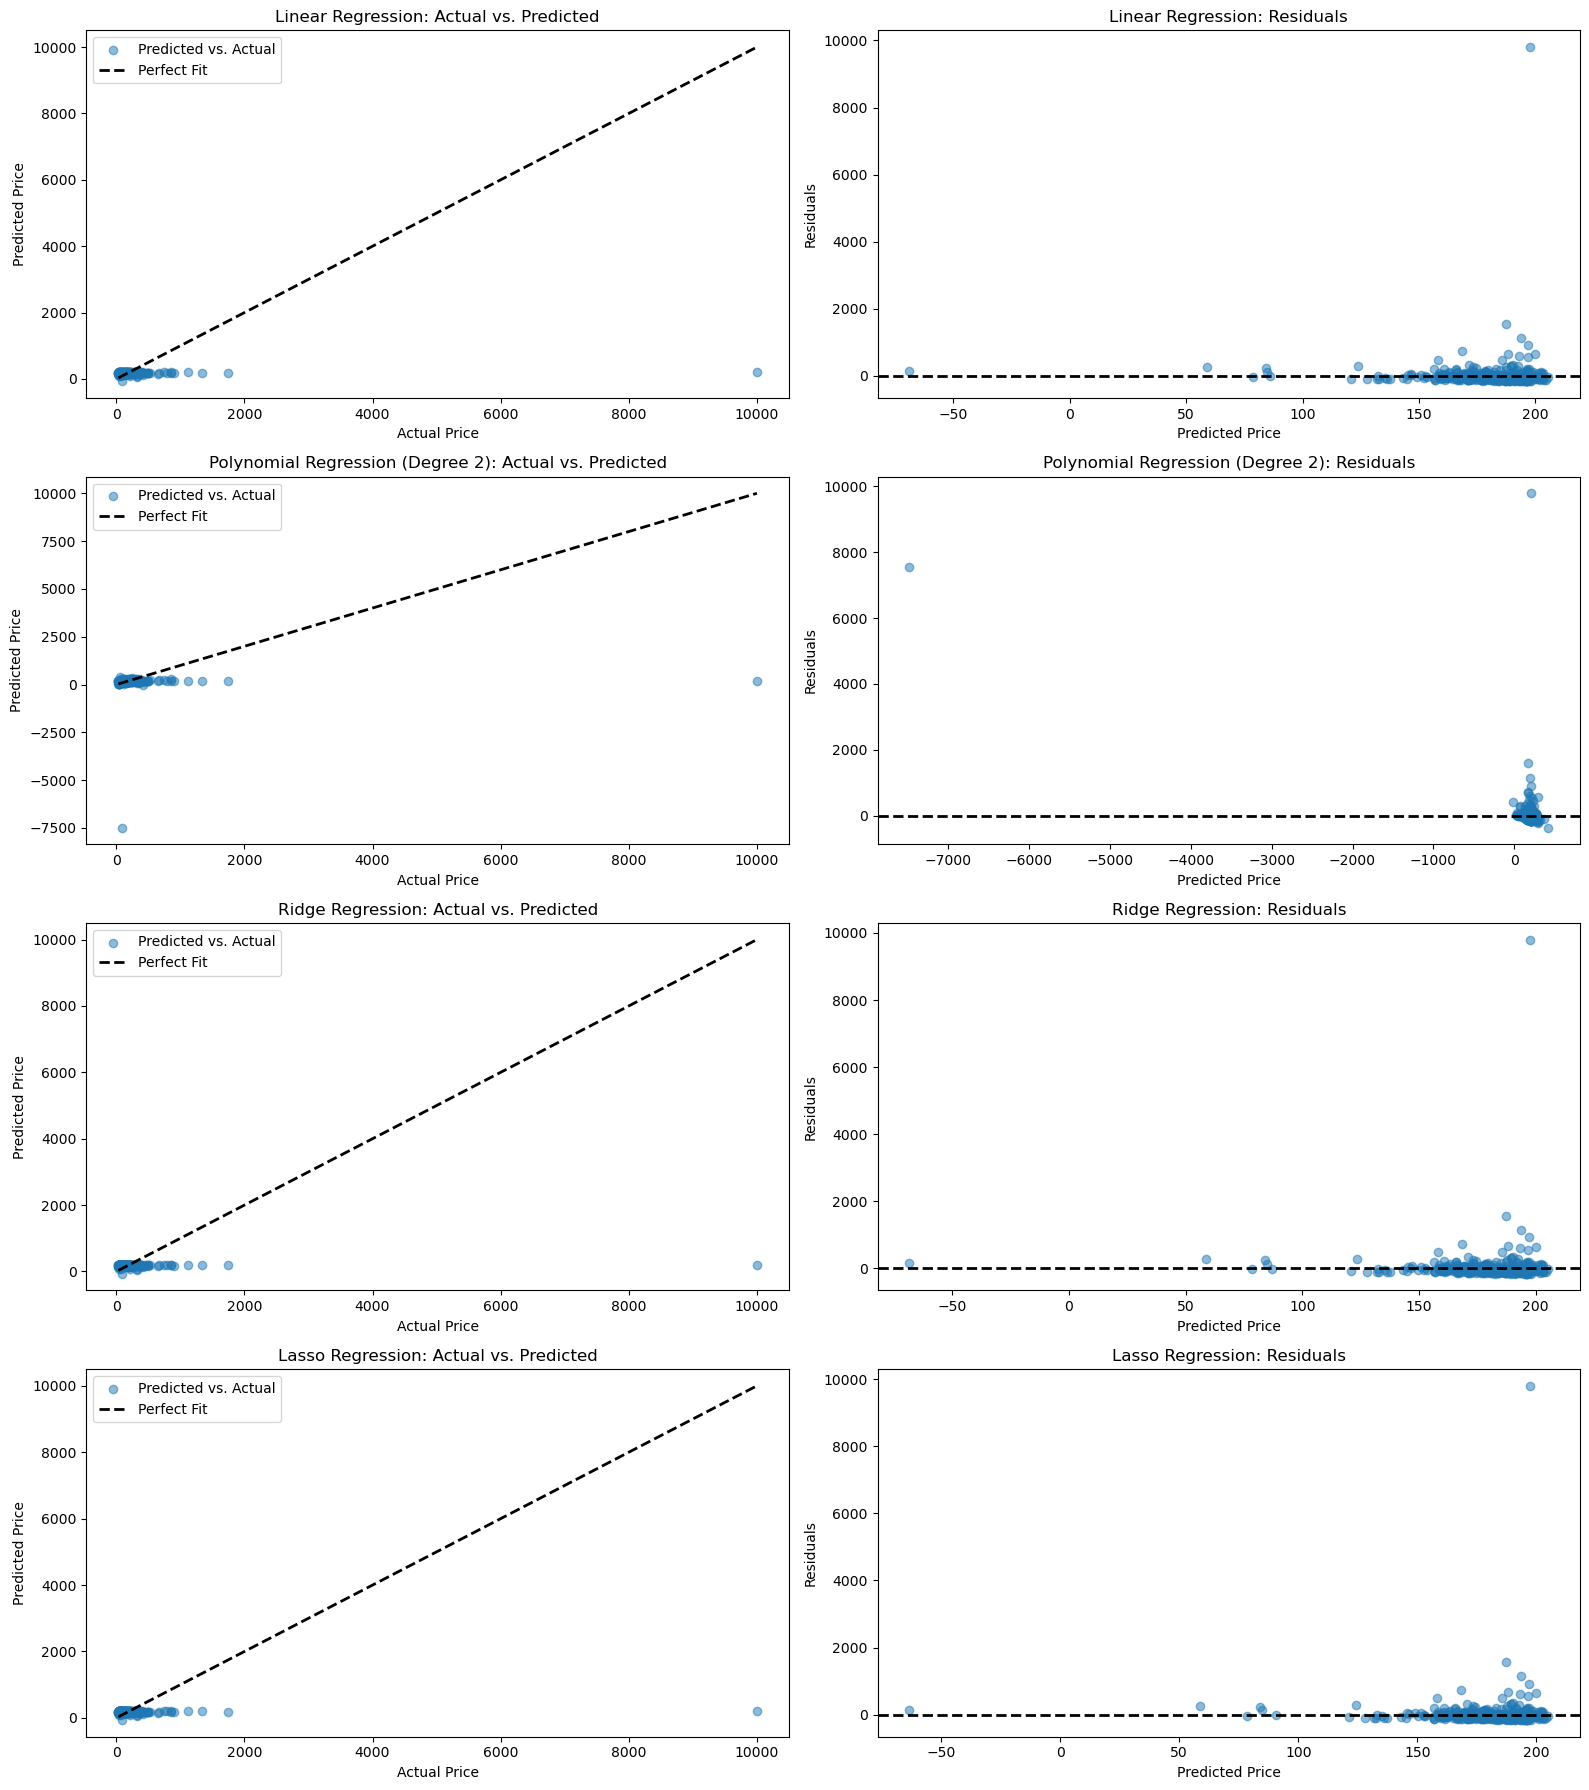

                              Model  Mean Squared Error  \
0                 Linear Regression       282610.081039   
1  Polynomial Regression (Degree 2)       433218.689811   
2                  Ridge Regression       282610.799717   
3                  Lasso Regression       282613.007670   

   Root Mean Squared Error  Mean Absolute Error  \
0               531.610836           127.776337   
1               658.193505           146.801460   
2               531.611512           127.773586   
3               531.613589           127.749242   

   Mean Absolute Percentage Error  R^2 Score  
0                       90.973679   0.002481  
1                      109.883328  -0.529117  
2                       90.973819   0.002478  
3                       90.957973   0.002471  


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

# Sample the data to avoid crashes
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Preprocess the data
# Convert non-numeric values to NaN
df_sample['rating'] = pd.to_numeric(df_sample['rating'], errors='coerce')

# Fill missing values with mean (for numeric columns)
df_sample['rating'].fillna(df_sample['rating'].mean(), inplace=True)

# Define features and target
X = df_sample[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'rating']]
y = df_sample['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Prepare dictionaries to store evaluation metrics
metrics = {
    'Model': [],
    'Mean Squared Error': [],
    'Root Mean Squared Error': [],
    'Mean Absolute Error': [],
    'Mean Absolute Percentage Error': [],
    'R^2 Score': []
}

# Plot setup
fig, axs = plt.subplots(4, 2, figsize=(16, 18))

for i, (model_name, model) in enumerate(models.items()):
    # Fit model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Mean Squared Error'].append(mse)
    metrics['Root Mean Squared Error'].append(rmse)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Mean Absolute Percentage Error'].append(mape)
    metrics['R^2 Score'].append(r2)

    # Plot Actual vs. Predicted
    ax = axs[i, 0]
    ax.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    ax.set_title(f'{model_name}: Actual vs. Predicted')
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.legend()

    # Plot Residuals
    residuals = y_test - y_pred
    ax = axs[i, 1]
    ax.scatter(y_pred, residuals, alpha=0.5)
    ax.axhline(0, color='k', linestyle='--', lw=2)
    ax.set_title(f'{model_name}: Residuals')
    ax.set_xlabel('Predicted Price')
    ax.set_ylabel('Residuals')

# Save the combined plots
plt.tight_layout()
plt.savefig('regression_models_comparison.png')
plt.show()

# Convert metrics dictionary to DataFrame and print
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                                  Mean Squared Error  Root Mean Squared Error  \
Linear Regression                       90197.075109               300.328279   
Polynomial Regression (Degree 2)        89960.240696               299.933727   
Ridge Regression                        90196.614623               300.327512   
Lasso Regression                        90020.797047               300.034660   

                                  Mean Absolute Error  \
Linear Regression                          121.802267   
Polynomial Regression (Degree 2)           121.153338   
Ridge Regression                           121.801220   
Lasso Regression                           121.373714   

                                  Mean Absolute Percentage Error  R^2 Score  
Linear Regression                                     106.656447  -0.001312  
Polynomial Regression (Degree 2)                      104.924286   0.001317  
Ridge Regression                                      106.655413  -0.00130

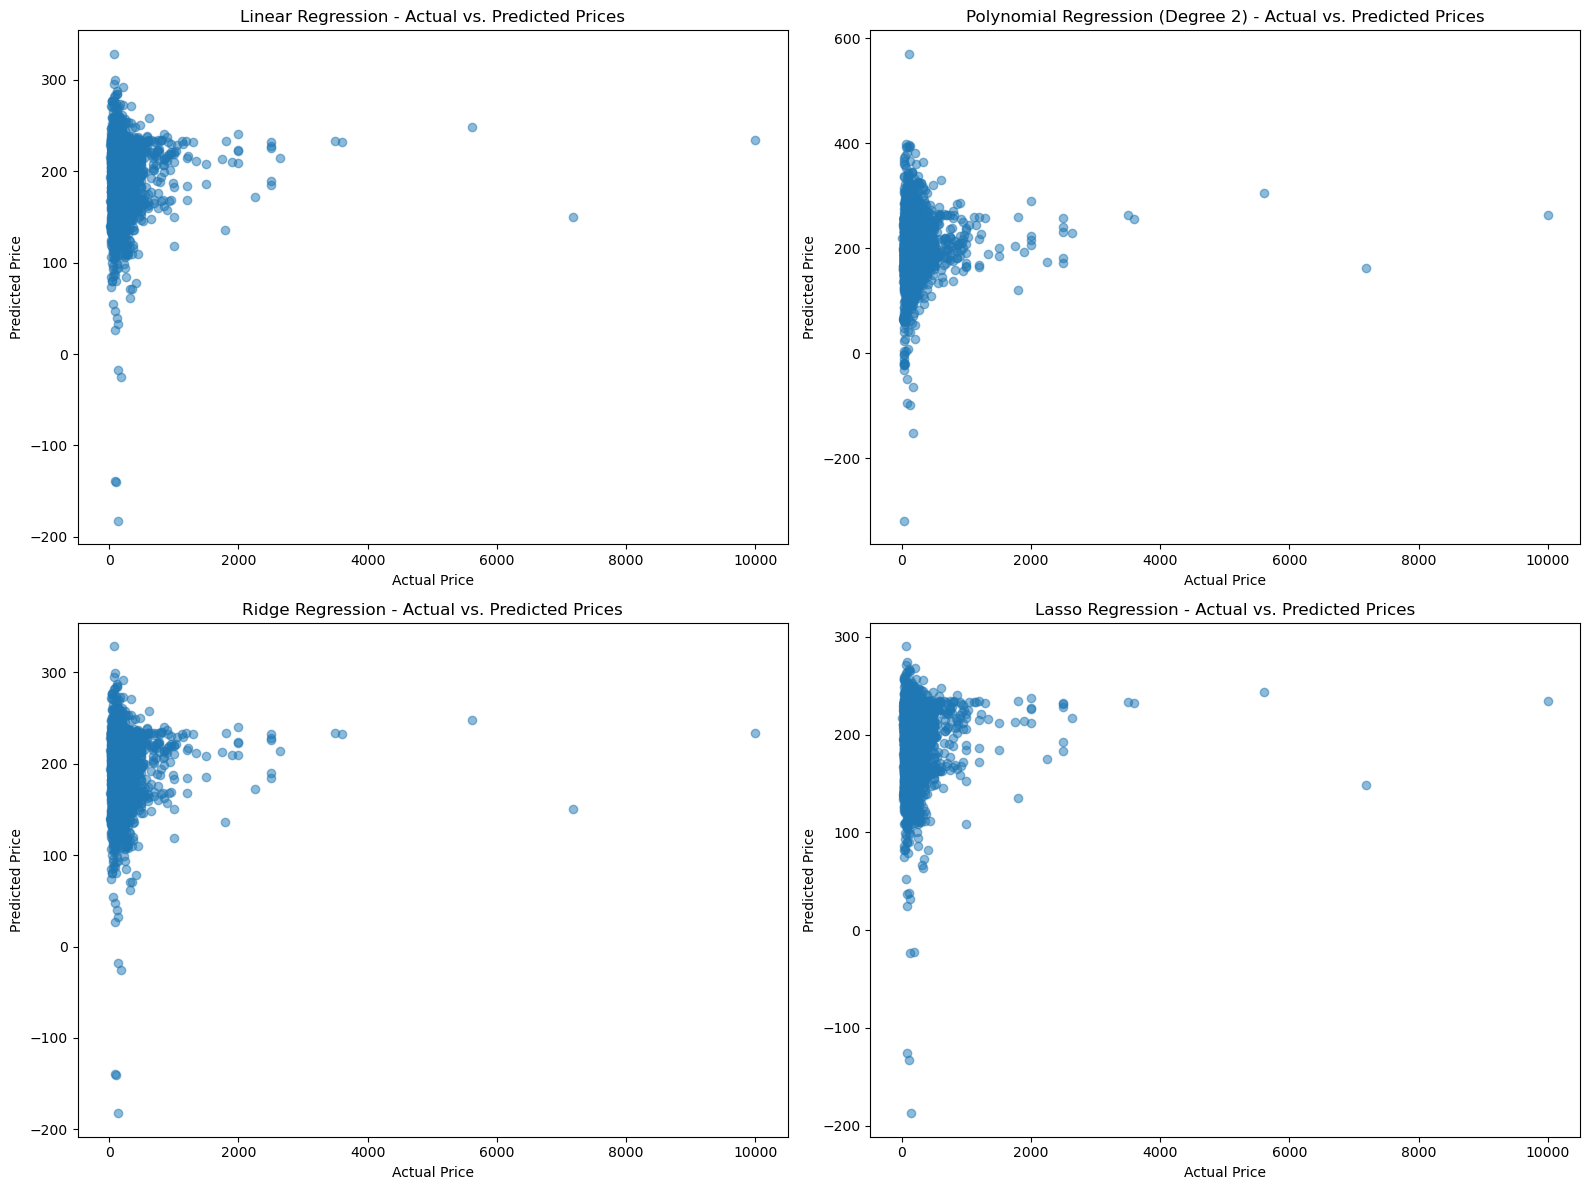

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess the dataset
#df = pd.read_csv('your_data.csv')

# Handle missing values: Impute missing values in numeric columns with mean
numeric_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'rating']
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
X = df[numeric_features]
y = df['price']

# Impute missing values in features and target
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y.dropna()
X_imputed = X_imputed[~y.isna()]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Dictionary to store results
results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mse, rmse, mae, mape, r2]
    
    # Plot Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'{name} - Actual vs. Predicted Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.savefig(f'{name}_actual_vs_predicted.png')
    plt.close()

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R^2 Score']).T

print(results_df)

# Plot all models' Actual vs. Predicted in a single image
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, name in enumerate(models.keys()):
    y_pred = models[name].predict(X_test)
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].set_title(f'{name} - Actual vs. Predicted Prices')
    axes[i].set_xlabel('Actual Price')
    axes[i].set_ylabel('Predicted Price')

plt.tight_layout()
plt.savefig('all_models_actual_vs_predicted.png')
plt.show()


## Model Improvement

                                  Mean Squared Error  Root Mean Squared Error  \
Linear Regression                       90197.075109               300.328279   
Polynomial Regression (Degree 2)        89960.240696               299.933727   
Ridge Regression                        90196.614623               300.327512   
Lasso Regression                        90020.797047               300.034660   

                                  Mean Absolute Error  \
Linear Regression                          121.802267   
Polynomial Regression (Degree 2)           121.153338   
Ridge Regression                           121.801220   
Lasso Regression                           121.373714   

                                  Mean Absolute Percentage Error  R^2 Score  
Linear Regression                                     106.656447  -0.001312  
Polynomial Regression (Degree 2)                      104.924286   0.001317  
Ridge Regression                                      106.655413  -0.00130

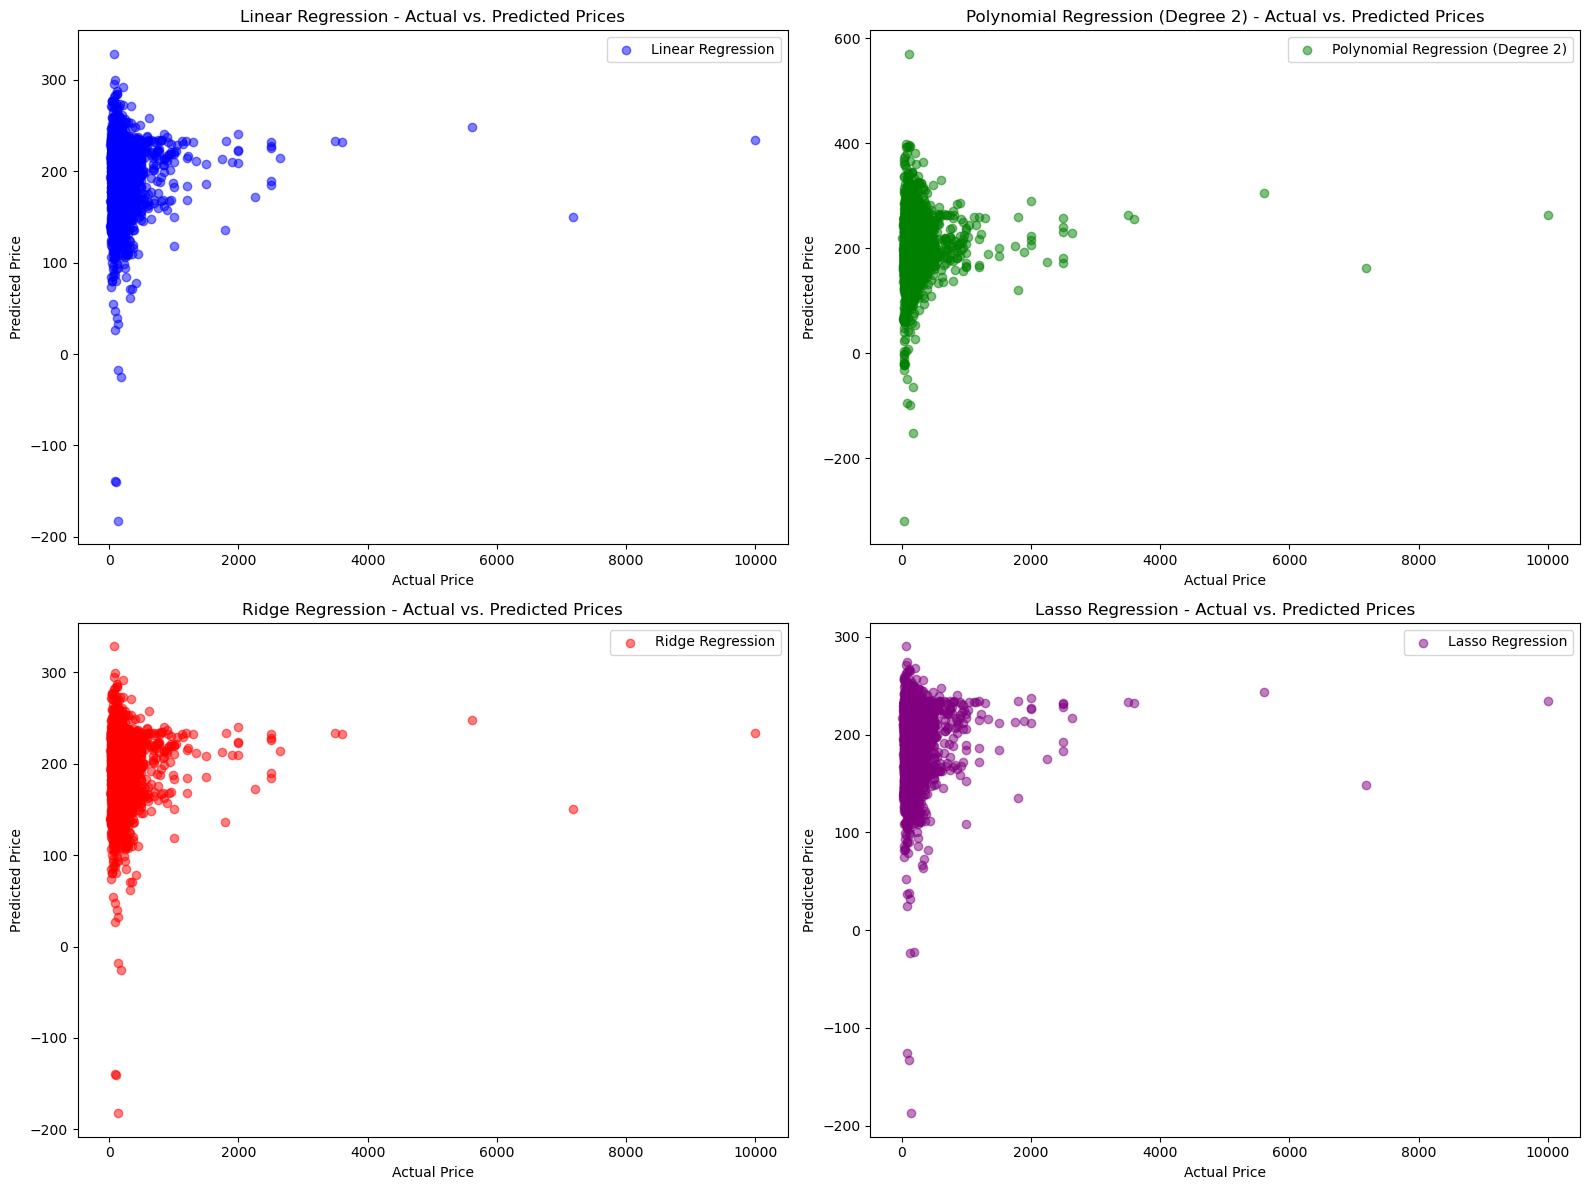

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess the dataset
# df = pd.read_csv('your_data.csv')

# Handle missing values: Impute missing values in numeric columns with mean
numeric_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'rating']
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
X = df[numeric_features]
y = df['price']

# Impute missing values in features and target
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y.dropna()
X_imputed = X_imputed[~y.isna()]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Dictionary to store results
results = {}

# Define colors for the plots
colors = ['blue', 'green', 'red', 'purple']

for i, (name, model) in enumerate(models.items()):
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mse, rmse, mae, mape, r2]
    
    # Plot Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color=colors[i], alpha=0.5, label=name)
    plt.title(f'{name} - Actual vs. Predicted Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.savefig(f'{name}_actual_vs_predicted.png')
    plt.close()

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R^2 Score']).T

print(results_df)

# Plot all models' Actual vs. Predicted in a single image with legends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axes[i].scatter(y_test, y_pred, color=colors[i], alpha=0.5, label=name)
    axes[i].set_title(f'{name} - Actual vs. Predicted Prices')
    axes[i].set_xlabel('Actual Price')
    axes[i].set_ylabel('Predicted Price')
    axes[i].legend()

plt.tight_layout()
plt.savefig('all_models_actual_vs_predicted_with_legends.png')
plt.show()


                                  Mean Squared Error  Root Mean Squared Error  \
Linear Regression                       90197.075109               300.328279   
Polynomial Regression (Degree 2)        89960.240696               299.933727   
Ridge Regression                        90196.614623               300.327512   
Lasso Regression                        90020.797047               300.034660   

                                  Mean Absolute Error  \
Linear Regression                          121.802267   
Polynomial Regression (Degree 2)           121.153338   
Ridge Regression                           121.801220   
Lasso Regression                           121.373714   

                                  Mean Absolute Percentage Error  R^2 Score  
Linear Regression                                     106.656447  -0.001312  
Polynomial Regression (Degree 2)                      104.924286   0.001317  
Ridge Regression                                      106.655413  -0.00130

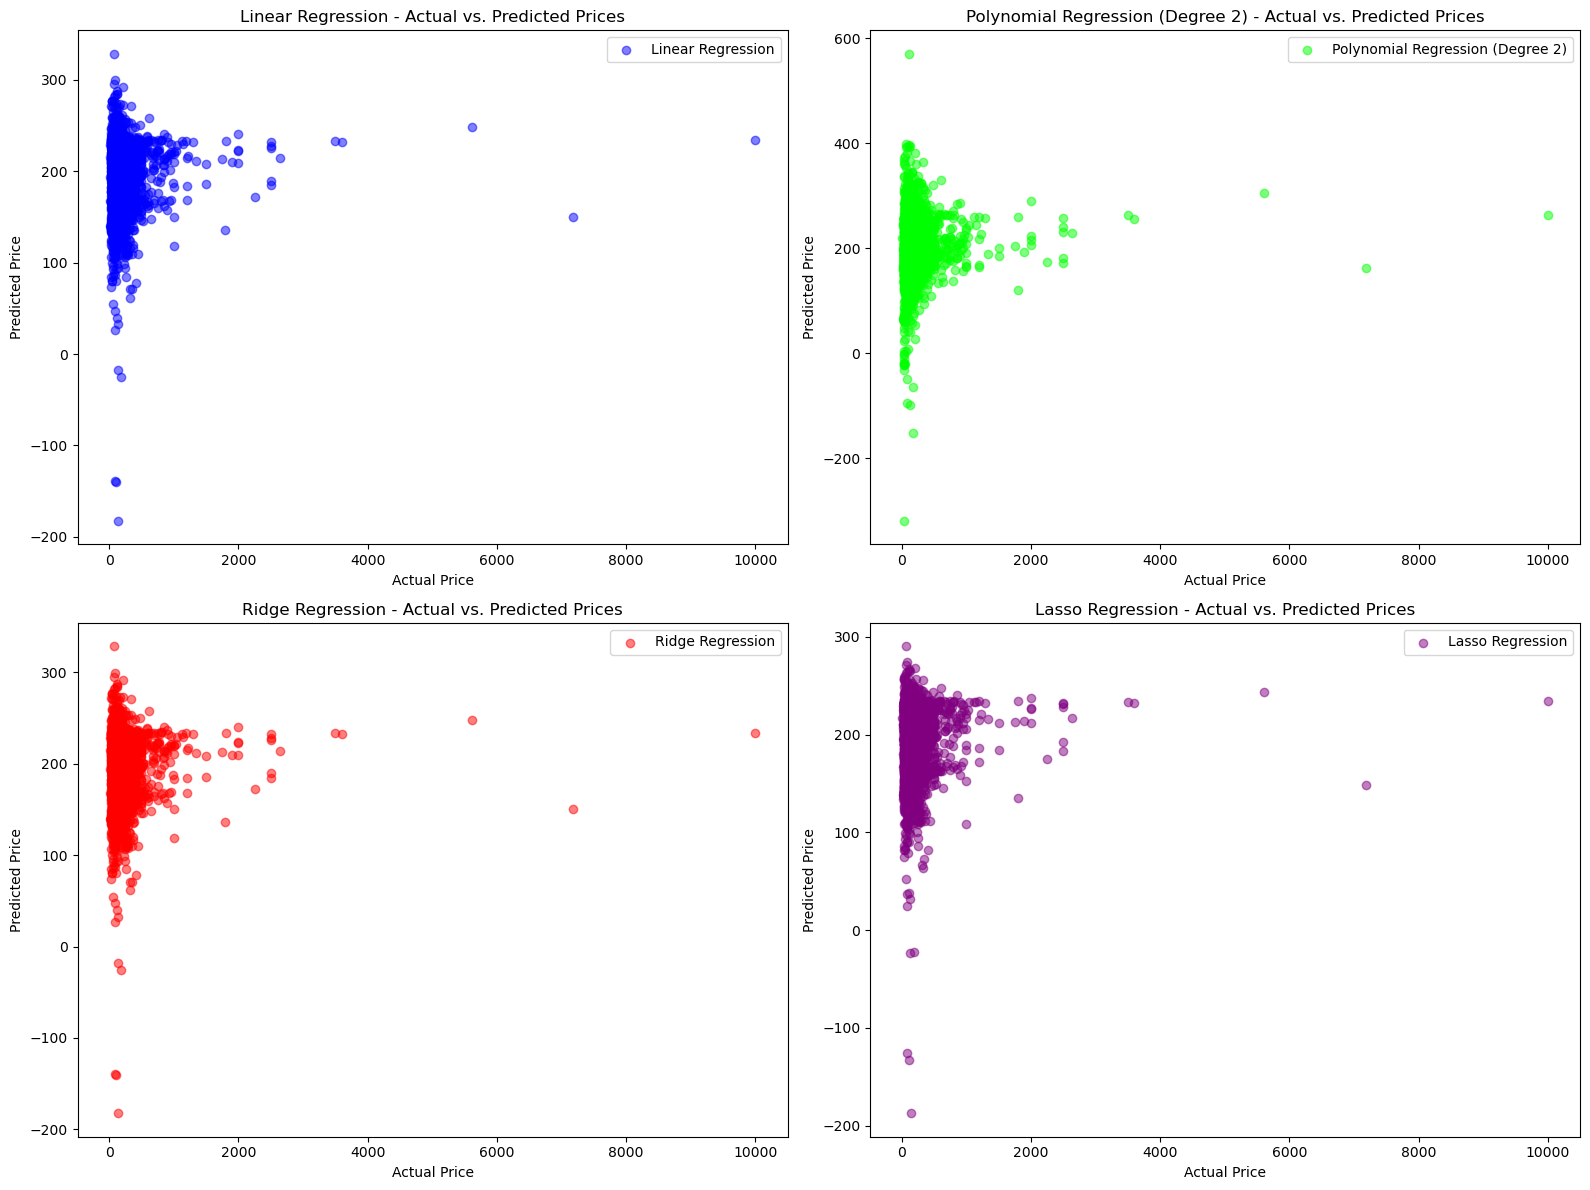

Selected Features: ['minimum_nights' 'number_of_reviews' 'reviews_per_month'
 'availability_365' 'rating']
Best Parameters: {'alpha': 100.0}
Best R^2 Score: -0.006068675200384344


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
# Handle missing values: Impute missing values in numeric columns with mean
numeric_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'rating']
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
X = df[numeric_features]
y = df['price']

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y.dropna()
X_imputed = X_imputed[~y.isna()]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Dictionary to store results
results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mse, rmse, mae, mape, r2]
    
    # Plot Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'{name} - Actual vs. Predicted Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.savefig(f'{name}_actual_vs_predicted.png')
    plt.close()

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R^2 Score']).T
print(results_df)

# Plot all models' Actual vs. Predicted in a single image with legends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
colors = ['#0000FF', '#00FF00', '#FF0000', '#800080']

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axes[i].scatter(y_test, y_pred, color=colors[i], alpha=0.5, label=name)
    axes[i].set_title(f'{name} - Actual vs. Predicted Prices')
    axes[i].set_xlabel('Actual Price')
    axes[i].set_ylabel('Predicted Price')
    axes[i].legend()

plt.tight_layout()
plt.savefig('all_models_actual_vs_predicted_with_legends.png')
plt.show()

# Feature Selection
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_imputed, y_imputed)
selected_features = np.array(numeric_features)[fit.support_]
print("Selected Features:", selected_features)

# Ridge Regression with Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)
